In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("HouseData.csv")
print(data)

       Unnamed: 0     district         price  \
0               0       adalar   3,100,000TL   
1               1       adalar   1,600,000TL   
2               2       adalar  18,500,000TL   
3               3       adalar   9,500,000TL   
4               4       adalar  25,000,000TL   
...           ...          ...           ...   
25150       25150  zeytinburnu   1,850,000TL   
25151       25151  zeytinburnu   1,100,000TL   
25152       25152  zeytinburnu   9,000,000TL   
25153       25153  zeytinburnu  13,000,000TL   
25154       25154  zeytinburnu   1,000,000TL   

                                                 address    AdUpdateDate  \
0      ['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...   24 Şubat 2022   
1      ['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...    02 Mart 2022   
2      ['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...   11 Şubat 2022   
3      ['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...   11 Şubat 2022   
4      ['Anasayfa', 'Satılık Köşk', 'İstanb

In [4]:
data.shape

(25155, 38)

In [5]:
data.columns

Index(['Unnamed: 0', 'district', 'price', 'address', 'AdUpdateDate',
       'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'ItemStatus', 'NumberOfBathrooms',
       'NumberOfWCs', 'AdCreationDate', 'Type', 'NetSquareMeters',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Swap', 'Balcony',
       'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

In [6]:
data.isnull().sum()

Unnamed: 0                      0
district                        0
price                           0
address                         0
AdUpdateDate                    0
Category                        0
GrossSquareMeters               0
BuildingAge                     0
NumberFloorsofBuilding          0
UsingStatus                     0
EligibilityForInvestment     3649
BuildStatus                 13924
TitleStatus                 15443
ItemStatus                   6823
NumberOfBathrooms               0
NumberOfWCs                 17026
AdCreationDate                  0
Type                            0
NetSquareMeters                 0
NumberOfRooms                   0
FloorLocation                   0
HeatingType                     0
CreditEligibility               0
InsideTheSite                   0
StructureType               14749
MortgageStatus              19097
Swap                         4316
Balcony                     16046
PriceStatus                     0
RentalIncome  

In [7]:
data['IsItVideoNavigable?'].unique()

array([nan, 'Evet', 'Hayır'], dtype=object)

In [8]:
data['IsItVideoNavigable?'].value_counts(dropna=False)

IsItVideoNavigable?
NaN      19674
Hayır     3413
Evet      2068
Name: count, dtype: int64

In [9]:
data = data.drop(columns=['Unnamed: 0','BuildStatus', 'TitleStatus', 'ItemStatus',
       'NumberOfWCs', 'StructureType', 'MortgageStatus', 'Balcony',
       'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters','UsingStatus'])

In [10]:
data.shape

(25155, 20)

In [11]:
data.head(15)

,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,EligibilityForInvestment,NumberOfBathrooms,AdCreationDate,Type,NetSquareMeters,NumberOfRooms,FloorLocation,HeatingType,CreditEligibility,InsideTheSite,Swap,PriceStatus
0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Bilinmiyor,2,24 Şubat 2022,Konut,120 m2,3+1,Çatı Katı,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat
1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",02 Mart 2022,Satılık,120 m2,5-10,3,Yatırıma Uygun,1,21 Şubat 2022,Konut,100 m2,2+1,Bahçe Katı,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat
2,adalar,"18,500,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",11 Şubat 2022,Satılık,350 m2,21 Ve Üzeri,2,Bilinmiyor,3,11 Şubat 2022,Konut,300 m2,3+1,Düz Giriş,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat
3,adalar,"9,500,000TL","['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",11 Şubat 2022,Satılık,550 m2,11-15,3,Bilinmiyor,4,03 Şubat 2022,Konut,540 m2,8+ Oda,Düz Giriş,Kombi Doğalgaz,Krediye Uygun Değil,Hayır,Yok,Genel Fiyat
4,adalar,"25,000,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",19 Ocak 2022,Satılık,840 m2,21 Ve Üzeri,4,Bilinmiyor,3,19 Ocak 2022,Konut,700 m2,8+ Oda,Düz Giriş,Isıtma Yok,Krediye Uygun,Hayır,Yok,Genel Fiyat
5,adalar,"7,000,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",17 Ocak 2022,Satılık,200 m2,21 Ve Üzeri,2,Bilinmiyor,1,17 Ocak 2022,Konut,170 m2,3+2,Düz Giriş,Isıtma Yok,Krediye Uygun,Hayır,Yok,Genel Fiyat
6,adalar,"3,250,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",27 Şubat 2022,Satılık,400 m2,21 Ve Üzeri,3,NaN,5,12 Ocak 2022,Konut,370 m2,8+ Oda,Bahçe Dublex,Sobalı,Krediye Uygun,Hayır,NaN,Genel Fiyat
7,adalar,"2,850,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",22 Şubat 2022,Satılık,250 m2,21 Ve Üzeri,2,Bilinmiyor,2,11 Ocak 2022,Konut,200 m2,5+1,Villa Tipi,Isıtma Yok,Krediye Uygun,Hayır,Yok,Genel Fiyat
8,adalar,"8,350,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",16 Aralık 2021,Satılık,360 m2,21 Ve Üzeri,2,Bilinmiyor,2,16 Aralık 2021,Konut,240 m2,5+1,Düz Giriş,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat
9,adalar,"10,800,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",16 Aralık 2021,Satılık,180 m2,21 Ve Üzeri,2,Bilinmiyor,1,16 Aralık 2021,Konut,140 m2,5 Oda,Düz Giriş,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat


In [12]:
data['AdUpdateDate'].unique

<bound method Series.unique of 0         24 Şubat 2022
1          02 Mart 2022
2         11 Şubat 2022
3         11 Şubat 2022
4          19 Ocak 2022
              ...      
25150      12 Ocak 2022
25151    10 Aralık 2021
25152     26 Şubat 2022
25153      18 Ekim 2021
25154    10 Aralık 2021
Name: AdUpdateDate, Length: 25155, dtype: object>

In [13]:
aylar = {
    'Ocak': 'January',
    'Şubat': 'February',
    'Mart': 'March',
    'Nisan': 'April',
    'Mayıs': 'May',
    'Haziran': 'June',
    'Temmuz': 'July',
    'Ağustos': 'August',
    'Eylül': 'September',
    'Ekim': 'October',
    'Kasım': 'November',
    'Aralık': 'December'
}

data['AdUpdateDate'] = data['AdUpdateDate'].replace(aylar, regex=True)
data['AdUpdateDate'] = pd.to_datetime(
    data['AdUpdateDate'],
    format='%d %B %Y'
)

In [14]:
data['AdUpdateDate'].head()

0   2022-02-24
1   2022-03-02
2   2022-02-11
3   2022-02-11
4   2022-01-19
Name: AdUpdateDate, dtype: datetime64[ns]

In [15]:
data['Swap']

0        Yok
1        Yok
2        Yok
3        Yok
4        Yok
        ... 
25150    NaN
25151    Yok
25152    NaN
25153    NaN
25154    Yok
Name: Swap, Length: 25155, dtype: object

In [16]:
data['Swap'].unique()

array(['Yok', nan, 'Var'], dtype=object)

In [17]:
data['Swap'].value_counts(dropna=False)

Swap
Yok    17304
NaN     4316
Var     3535
Name: count, dtype: int64

In [18]:
data['price'].describe()

count           25155
unique           2825
top       1,350,000TL
freq              371
Name: price, dtype: object

In [19]:
data['price'].value_counts()

price
1,350,000TL                     371
1,250,000TL                     342
1,500,000TL                     335
1,100,000TL                     334
750,000TL                       332
                               ... 
14,905,504TL                      1
1,495,000TLarrow_downward%4       1
2,915,000TL                       1
34,550,000TLarrow_downward%3      1
4,885,000TL                       1
Name: count, Length: 2825, dtype: int64

In [20]:
data['price'] = (
    data['price']
    .str.replace('[^0-9]', '', regex=True)
)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [21]:
data['price'].dtype

dtype('int64')

In [22]:
pd.options.display.float_format = '{:,.0f}'.format

In [23]:
data['price'].describe()

count           25,155
mean        12,870,622
std        291,685,638
min             20,000
25%            800,000
50%          1,450,000
75%          3,500,000
max     38,500,000,016
Name: price, dtype: float64

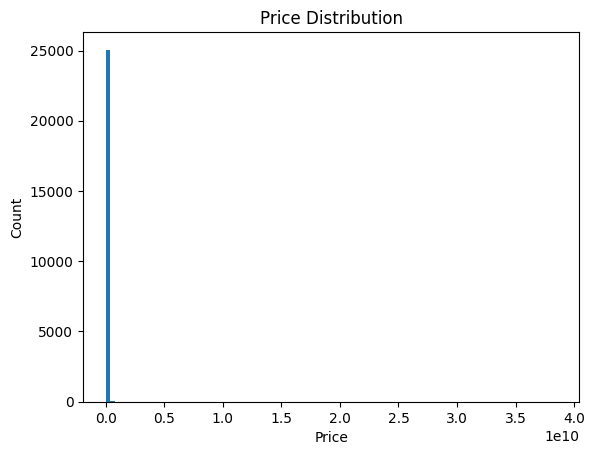

In [24]:
plt.figure()
plt.hist(data['price'].dropna(), bins=100)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.savefig('log_price_distribution_withouteda.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
data['log_price'] =np.log10(data['price'])

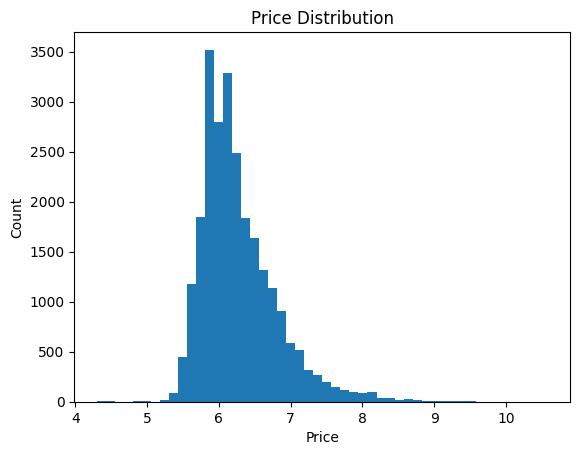

In [26]:
plt.figure()
plt.hist(data['log_price'].dropna(),bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.savefig('log_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
cols = ['GrossSquareMeters', 'NetSquareMeters',]
data[cols] = data[cols].apply(
    lambda x: pd.to_numeric(
        x.astype(str).str.replace('[^0-9]', '', regex=True),
        errors='coerce'
    )
)

In [28]:
data.dtypes

district                            object
price                                int64
address                             object
AdUpdateDate                datetime64[ns]
Category                            object
GrossSquareMeters                    int64
BuildingAge                         object
NumberFloorsofBuilding               int64
EligibilityForInvestment            object
NumberOfBathrooms                   object
AdCreationDate                      object
Type                                object
NetSquareMeters                      int64
NumberOfRooms                       object
FloorLocation                       object
HeatingType                         object
CreditEligibility                   object
InsideTheSite                       object
Swap                                object
PriceStatus                         object
log_price                          float64
dtype: object

In [29]:
data.describe()

,price,AdUpdateDate,GrossSquareMeters,NumberFloorsofBuilding,NetSquareMeters,log_price
count,"25,155",25155,"25,155","25,155","25,155","25,155"
mean,"12,870,622",2022-02-02 13:40:26.189624320,"1,752",8,"1,449",6
min,"20,000",2021-09-05 00:00:00,322,1,12,4
25%,"800,000",2022-01-20 00:00:00,952,4,837,6
50%,"1,450,000",2022-02-17 00:00:00,"1,242",5,"1,052",6
75%,"3,500,000",2022-02-28 00:00:00,"1,702",8,"1,482",7
max,"38,500,000,016",2022-03-10 00:00:00,"523,002",71,"520,002",11
std,"291,685,638",NaN,"5,476",7,"4,446",1


In [30]:
data.head()

,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,EligibilityForInvestment,NumberOfBathrooms,...,Type,NetSquareMeters,NumberOfRooms,FloorLocation,HeatingType,CreditEligibility,InsideTheSite,Swap,PriceStatus,log_price
0,adalar,3100000,"['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",2022-02-24,Satılık,1602,21 Ve Üzeri,3,Bilinmiyor,2,...,Konut,1202,3+1,Çatı Katı,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat,6
1,adalar,1600000,"['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",2022-03-02,Satılık,1202,5-10,3,Yatırıma Uygun,1,...,Konut,1002,2+1,Bahçe Katı,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat,6
2,adalar,18500000,"['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",2022-02-11,Satılık,3502,21 Ve Üzeri,2,Bilinmiyor,3,...,Konut,3002,3+1,Düz Giriş,Kombi Doğalgaz,Krediye Uygun,Hayır,Yok,Genel Fiyat,7
3,adalar,9500000,"['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",2022-02-11,Satılık,5502,11-15,3,Bilinmiyor,4,...,Konut,5402,8+ Oda,Düz Giriş,Kombi Doğalgaz,Krediye Uygun Değil,Hayır,Yok,Genel Fiyat,7
4,adalar,25000000,"['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",2022-01-19,Satılık,8402,21 Ve Üzeri,4,Bilinmiyor,3,...,Konut,7002,8+ Oda,Düz Giriş,Isıtma Yok,Krediye Uygun,Hayır,Yok,Genel Fiyat,7


In [31]:
data.shape

(25155, 21)

In [32]:
data['GrossSquareMeters'].describe()

count    25,155
mean      1,752
std       5,476
min         322
25%         952
50%       1,242
75%       1,702
max     523,002
Name: GrossSquareMeters, dtype: float64

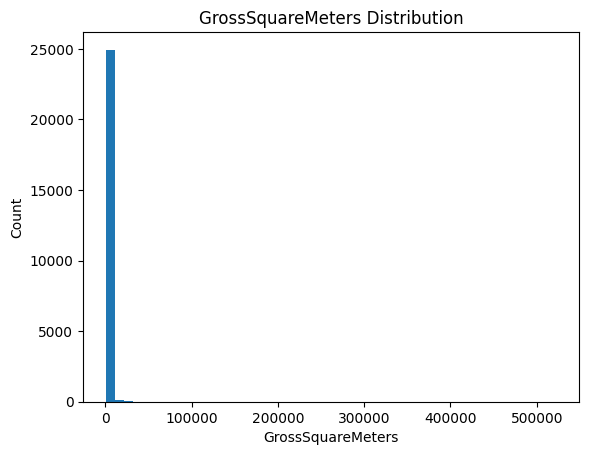

In [33]:
plt.figure()
plt.hist(data['GrossSquareMeters'].dropna(),bins=50)
plt.xlabel('GrossSquareMeters')
plt.ylabel('Count')
plt.title('GrossSquareMeters Distribution')
plt.savefig('gross_square_meters_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

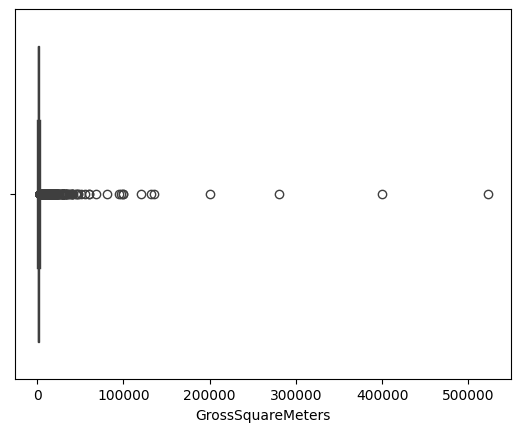

In [34]:
sns.boxplot(x=data['GrossSquareMeters'])
plt.show()

In [35]:
data.sort_values('GrossSquareMeters', ascending=False).head(5)

,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,EligibilityForInvestment,NumberOfBathrooms,...,Type,NetSquareMeters,NumberOfRooms,FloorLocation,HeatingType,CreditEligibility,InsideTheSite,Swap,PriceStatus,log_price
18512,pendik,22000000,"['Anasayfa', 'Satılık Çiftlik Evi', 'İstanbul ...",2022-01-13,Satılık,523002,5-10,2,Yatırıma Uygun,1,...,Konut,520002,1+1,Bahçe Katı,Güneş Enerjisi,Krediye Uygun,Hayır,NaN,Genel Fiyat,7
7777,catalca,300000,"['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",2022-02-22,Satılık,399992,0 (Yeni),1,NaN,1,...,Konut,4002,1 Oda,1. Kat,Isıtma Yok,Krediye Uygun Değil,Hayır,Var,Genel Fiyat,5
7300,buyukcekmece,11000000,"['Anasayfa', 'Satılık Villa', 'İstanbul Satılı...",2021-12-30,Satılık,280002,5-10,2,Bilinmiyor,4,...,Konut,250002,5+2,Villa Tipi,Klimalı,Bilinmiyor,Hayır,NaN,Genel Fiyat,7
4961,bayrampasa,120000000,"['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",2022-01-26,Satılık,200002,21 Ve Üzeri,5,Bilinmiyor,Yok,...,Konut,199992,1 Oda,Düz Giriş,Isıtma Yok,Krediye Uygun,Hayır,Yok,Genel Fiyat,8
2006,bagcilar,120000000,"['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",2021-11-22,Satılık,135002,21 Ve Üzeri,8,Bilinmiyor,Yok,...,Konut,134992,1 Oda,Düz Giriş,Isıtma Yok,Krediye Uygun,Hayır,Yok,Genel Fiyat,8


In [36]:
data['address'].unique()

array(["['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Adalar Satılık Daire', 'Maden Mahallesi Satılık Daire']",
       "['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul Satılık Müstakil Ev', 'Adalar Satılık Müstakil Ev', 'Maden Mahallesi Satılık Müstakil Ev']",
       "['Anasayfa', 'Satılık Bina', 'İstanbul Satılık Bina', 'Adalar Satılık Bina', 'Maden Mahallesi Satılık Bina']",
       ...,
       "['Anasayfa', 'Satılık Bina', 'İstanbul Satılık Bina', 'Zeytinburnu Satılık Bina', 'Yenidoğan Mahallesi Satılık Bina']",
       "['Anasayfa', 'Satılık Residence', 'İstanbul Satılık Residence', 'Zeytinburnu Satılık Residence', 'Nuripaşa Mahallesi Satılık Residence']",
       "['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul Satılık Müstakil Ev', 'Zeytinburnu Satılık Müstakil Ev', 'Merkezefendi Mahallesi Satılık Müstakil Ev']"],
      shape=(1638,), dtype=object)

In [37]:
data['address'].value_counts()

address
['Anasayfa', 'Satılık Residence', 'İstanbul Satılık Residence', 'Sarıyer Satılık Residence', 'Maslak Mahallesi Satılık Residence']                      452
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Bahçelievler Satılık Daire', 'Siyavuşpaşa Mahallesi Satılık Daire']                            314
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Kadıköy Satılık Daire', 'Suadiye Mahallesi Satılık Daire']                                     266
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Sultangazi Satılık Daire', 'İsmetpaşa Mahallesi Satılık Daire']                                223
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Maltepe Satılık Daire', 'Altıntepe Mahallesi Satılık Daire']                                   218
                                                                                                                                                       ... 
['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul Satılık Mü

In [38]:
data = data[
    ~data['address'].str.contains('Satılık Bina|Satılık Residence|Satılık Villa|Satılık Prefabrik|Satılık Kooperatif', case=False, na=False)
]

In [39]:
data['address'].value_counts()

address
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Bahçelievler Satılık Daire', 'Siyavuşpaşa Mahallesi Satılık Daire']                                314
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Kadıköy Satılık Daire', 'Suadiye Mahallesi Satılık Daire']                                         266
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Sultangazi Satılık Daire', 'İsmetpaşa Mahallesi Satılık Daire']                                    223
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Maltepe Satılık Daire', 'Altıntepe Mahallesi Satılık Daire']                                       218
['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Kadıköy Satılık Daire', 'Erenköy Mahallesi Satılık Daire']                                         207
                                                                                                                                                           ... 
['Anasayfa', 'Satılık Müstakil E

In [40]:
data['address'].unique()

array(["['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Adalar Satılık Daire', 'Maden Mahallesi Satılık Daire']",
       "['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul Satılık Müstakil Ev', 'Adalar Satılık Müstakil Ev', 'Maden Mahallesi Satılık Müstakil Ev']",
       "['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık Köşk', 'Adalar Satılık Köşk', 'Maden Mahallesi Satılık Köşk']",
       ...,
       "['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Zeytinburnu Satılık Daire', 'Telsiz Mahallesi Satılık Daire']",
       "['Anasayfa', 'Satılık Daire', 'İstanbul Satılık Daire', 'Zeytinburnu Satılık Daire', 'Gökalp Mahallesi Satılık Daire']",
       "['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul Satılık Müstakil Ev', 'Zeytinburnu Satılık Müstakil Ev', 'Merkezefendi Mahallesi Satılık Müstakil Ev']"],
      shape=(1005,), dtype=object)

In [41]:
data = data[data['NetSquareMeters']<= 1000]

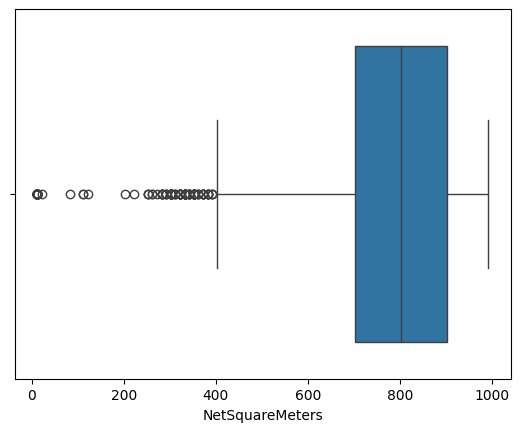

In [42]:
sns.boxplot(x=data['NetSquareMeters'])
plt.show()

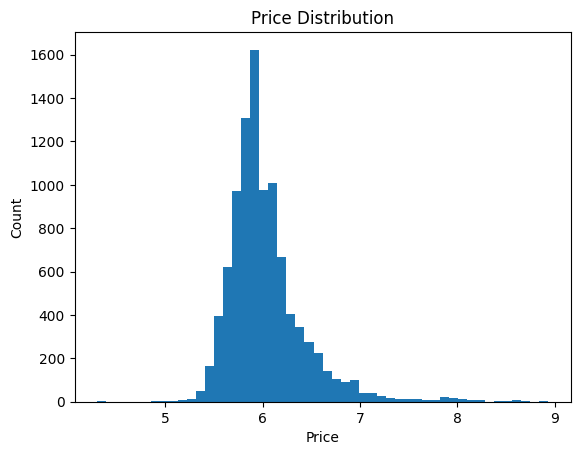

In [43]:
plt.figure()
plt.hist(data['log_price'].dropna(),bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

In [44]:
data['NetSquareMeters'].describe()

count   9,756
mean      776
std       149
min        12
25%       702
50%       802
75%       902
max       992
Name: NetSquareMeters, dtype: float64

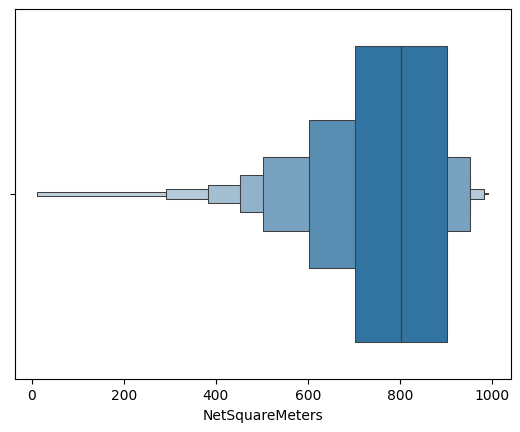

In [45]:
sns.boxenplot(x=data['NetSquareMeters'])
plt.show()

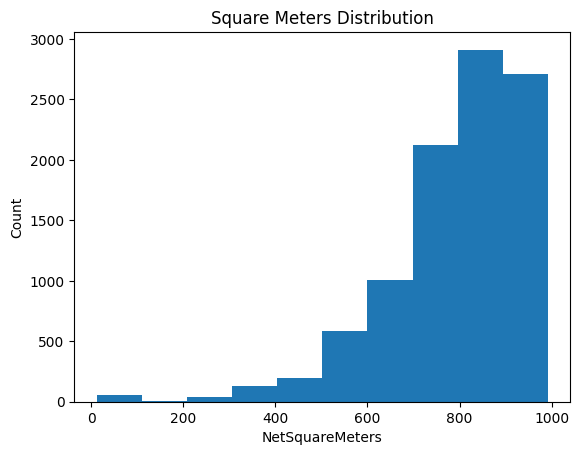

In [46]:
plt.figure()
plt.hist(data['NetSquareMeters'].dropna(),bins=10)
plt.xlabel('NetSquareMeters')
plt.ylabel('Count')
plt.title('Square Meters Distribution')
plt.show()

In [47]:
data['NetSquareMeters'].value_counts()

NetSquareMeters
902    1529
802    1291
852    1283
752     917
952     899
       ... 
22        1
272       1
222       1
82        1
202       1
Name: count, Length: 82, dtype: int64

In [48]:
Q1 = data['NetSquareMeters'].quantile(0.25)
Q3 = data['NetSquareMeters'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data = data[
    (data['NetSquareMeters'] >= lower) &
     (data['NetSquareMeters'] <= upper)
]

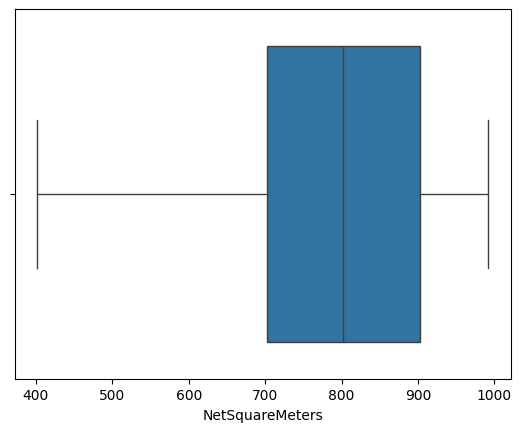

In [49]:
sns.boxplot(x=data['NetSquareMeters'])
plt.show()

In [50]:
data.dtypes

district                            object
price                                int64
address                             object
AdUpdateDate                datetime64[ns]
Category                            object
GrossSquareMeters                    int64
BuildingAge                         object
NumberFloorsofBuilding               int64
EligibilityForInvestment            object
NumberOfBathrooms                   object
AdCreationDate                      object
Type                                object
NetSquareMeters                      int64
NumberOfRooms                       object
FloorLocation                       object
HeatingType                         object
CreditEligibility                   object
InsideTheSite                       object
Swap                                object
PriceStatus                         object
log_price                          float64
dtype: object

In [51]:
data['NumberOfBathrooms'].value_counts()

NumberOfBathrooms
1      8197
2      1363
Yok      17
3        12
5         5
6+        2
4         1
Name: count, dtype: int64

In [52]:
data.shape

(9597, 21)

In [53]:
data = data[~(data['NumberOfBathrooms'] == 'Yok')]

In [54]:
data.shape

(9580, 21)

In [55]:
data['BuildingAge'].value_counts()

BuildingAge
0 (Yeni)       3134
5-10           1820
21 Ve Üzeri    1546
4               950
11-15           647
3               502
2               429
1               319
16-20           233
Name: count, dtype: int64

In [56]:
data['BuildingAge'].value_counts()

BuildingAge
0 (Yeni)       3134
5-10           1820
21 Ve Üzeri    1546
4               950
11-15           647
3               502
2               429
1               319
16-20           233
Name: count, dtype: int64

In [57]:
data['BuildingAge'] = data['BuildingAge'].astype(str)

In [58]:
age_map = {
    '0 (Yeni)':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5-10':7,
    '11-15':13,
    '16-20':18,
    '21 Ve Üzeri':25   
}

data['BuildingAge_ordinal'] = data['BuildingAge'].map(age_map)

In [59]:
data['BuildingAge_ordinal'].value_counts()

BuildingAge_ordinal
0     3134
7     1820
25    1546
4      950
13     647
3      502
2      429
1      319
18     233
Name: count, dtype: int64

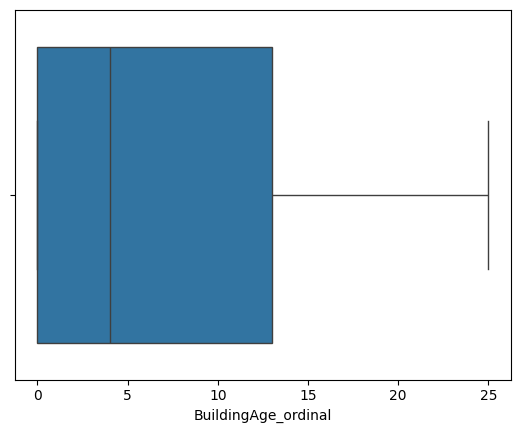

In [60]:
sns.boxplot(x=data['BuildingAge_ordinal'])
plt.show()

In [61]:
data['FloorLocation'].value_counts()

FloorLocation
1. Kat             1451
2. Kat             1433
Bahçe Katı         1173
Yüksek Giriş       1123
3. Kat             1036
4. Kat              648
Düz Giriş           569
5. Kat              444
6. Kat              235
7. Kat              175
8. Kat              160
Kot 1 (-1). Kat     130
9. Kat              120
10. Kat              96
11. Kat              82
12. Kat              68
Kot 2 (-2). Kat      58
13. Kat              54
Çatı Katı            51
14. Kat              47
15. Kat              41
Müstakil             35
Bahçe Dublex         31
16. Kat              31
Tam Bodrum           28
17. Kat              27
Yarı Bodrum          27
Yüksek Bodrum        24
20. Kat              20
19. Kat              18
18. Kat              18
Kot 3 (-3). Kat      17
22. Kat              17
21. Kat              17
30-40. Kat           12
23. Kat              11
28. Kat               8
24. Kat               7
Çatı Dubleks          7
25. Kat               6
26. Kat               6
10

In [62]:
data["FloorLocation"].dtype

dtype('O')

In [63]:
data["FloorLocation"] = data["FloorLocation"].astype(str)

In [64]:
data["FloorLocation"].dtype

dtype('O')

In [65]:
data["FloorNumber"] = (data["FloorLocation"].str.extract(r"(-?\d+)").astype(float))
ground_keys = "Giriş|Bahçe|Bodrum|Müstakil|Villa"
data.loc[data["FloorLocation"].str.contains(ground_keys, case=False,na=False),"FloorNumber"] = 0

In [66]:
data_raw = data.copy()

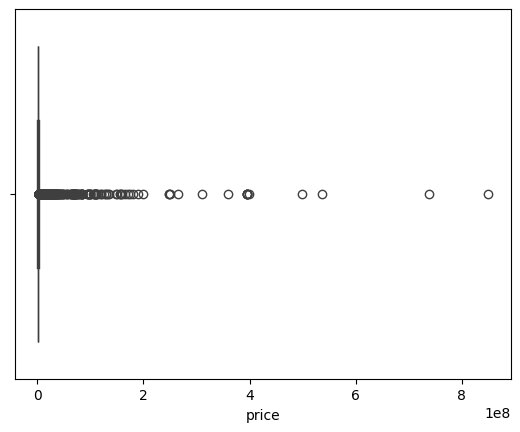

In [67]:
sns.boxplot(x=data['price'])
plt.show()

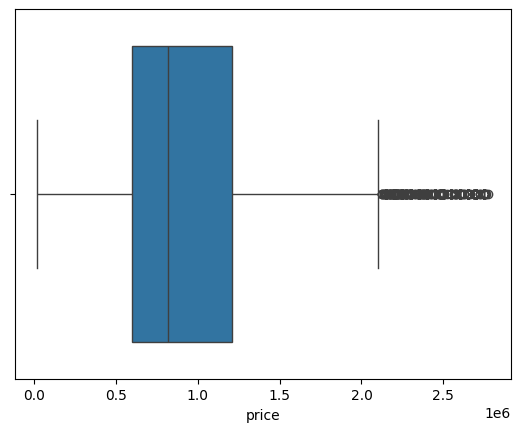

In [68]:
data = data_raw.copy()

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data = data[
    (data['price'] >= lower) &
     (data['price'] <= upper)
]
sns.boxplot(x=data['price'])
plt.show()

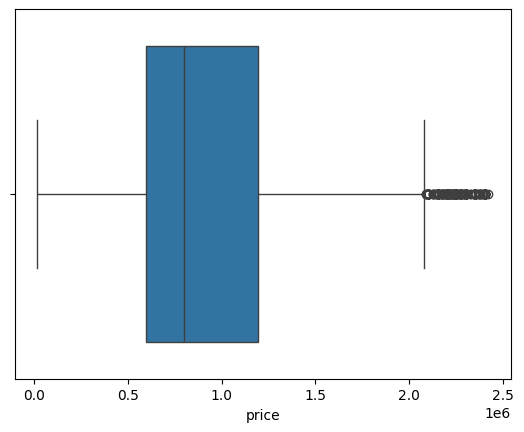

In [69]:
data = data_raw.copy()

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.71)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data = data[
    (data['price'] >= lower) &
     (data['price'] <= upper)
]
sns.boxplot(x=data['price'])
plt.show()

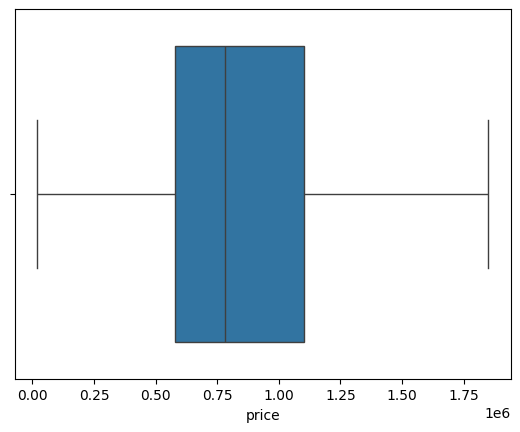

In [70]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.71)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data = data[
    (data['price'] >= lower) &
     (data['price'] <= upper)
]
sns.boxplot(x=data['price'])
plt.show()

In [71]:
last = data["address"].astype(str).str.extract(r"'([^']+)'\]$")[0]
data["neighborhood"] = last.str.replace(r"\s+Satılık.*$", "", regex=True)
data = data.drop(columns=["address"])

In [72]:
y = data["log_price"]
X = data.drop(["price","log_price","AdUpdateDate"], axis=1)

In [73]:
data["FloorNumber"]

16      0 
26      0 
28      0 
34      0 
38      5 
        ..
25133   7 
25135   3 
25140   4 
25141   2 
25154   3 
Name: FloorNumber, Length: 7787, dtype: float64

In [74]:
def floor_group(x):
    if x == 0 :
        return "Giriş"
    elif 1 <= x <= 5:
        return "1-5"
    elif 6 <= x <= 10:
        return "6-10"
    elif 11 <= x <= 20:
        return "11-20"
    else:
        return "21+"
X['FloorNumber'] = X['FloorNumber'].apply(floor_group)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=15
)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

In [78]:
y = data["log_price"]
X = data.drop(["price", "log_price","AdUpdateDate","AdCreationDate",], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ]
)

model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("regressor", Ridge())
    ]
)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE (log):", mean_absolute_error(y_test, pred))
print("R2:", r2_score(y_test, pred))


MAE (log): 0.08510611837044411
R2: 0.6564977018223299


In [79]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder

preprocess_dense = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ]), cat_cols),
    ]
)

model_tree = Pipeline(
    steps=[
        ("preprocess", preprocess_dense),
        ("regressor", HistGradientBoostingRegressor(random_state=42))
    ]
)

model_tree.fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)

print("MAE (log):", mean_absolute_error(y_test, pred_tree))
print("R2:", r2_score(y_test, pred_tree))


MAE (log): 0.07986675017454475
R2: 0.6994169014307063


In [80]:
X.columns

Index(['district', 'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'EligibilityForInvestment',
       'NumberOfBathrooms', 'Type', 'NetSquareMeters', 'NumberOfRooms',
       'FloorLocation', 'HeatingType', 'CreditEligibility', 'InsideTheSite',
       'Swap', 'PriceStatus', 'BuildingAge_ordinal', 'FloorNumber',
       'neighborhood'],
      dtype='object')

In [81]:
y = data["log_price"]
X = data.drop(["price", "log_price","AdUpdateDate","AdCreationDate",], axis=1)

cat_cols = X.select_dtypes(include=["object"]).columns

X[cat_cols] = X[cat_cols].fillna("Unknown").astype(str)

In [83]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
import os
from catboost import CatBoostRegressor

MODEL_PATH = "catboost_house_price.cbm"

model_cb = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.03,
    depth=8,
    loss_function="RMSE",
    random_state=42,
    verbose=200,
    early_stopping_rounds=300
)

if os.path.exists(MODEL_PATH):
    model_cb.load_model(MODEL_PATH)
    print("✅ Model dosyadan yüklendi.")
else:
    model_cb.fit(
        X_train, y_train,
        cat_features=list(cat_cols),
        eval_set=(X_test, y_test),
        use_best_model=True
    )
    model_cb.save_model(MODEL_PATH)
    print("✅ Model eğitildi ve kaydedildi.")



pred_cb = model_cb.predict(X_test)
print("MAE (log):", mean_absolute_error(y_test, pred_cb))
print("R2:", r2_score(y_test, pred_cb))

0:	learn: 0.1954461	test: 0.1922001	best: 0.1922001 (0)	total: 227ms	remaining: 18m 53s
200:	learn: 0.1103543	test: 0.1160469	best: 0.1160469 (200)	total: 12.6s	remaining: 5m
400:	learn: 0.0996883	test: 0.1108801	best: 0.1108801 (400)	total: 24.7s	remaining: 4m 43s
600:	learn: 0.0922379	test: 0.1083285	best: 0.1083285 (600)	total: 37.1s	remaining: 4m 31s
800:	learn: 0.0863296	test: 0.1067067	best: 0.1067036 (798)	total: 49.5s	remaining: 4m 19s
1000:	learn: 0.0812232	test: 0.1057630	best: 0.1057333 (990)	total: 1m 3s	remaining: 4m 14s
1200:	learn: 0.0769191	test: 0.1051017	best: 0.1051017 (1200)	total: 1m 17s	remaining: 4m 5s
1400:	learn: 0.0732827	test: 0.1044853	best: 0.1044853 (1400)	total: 1m 31s	remaining: 3m 56s
1600:	learn: 0.0697669	test: 0.1039691	best: 0.1039642 (1599)	total: 1m 46s	remaining: 3m 45s
1800:	learn: 0.0664092	test: 0.1036206	best: 0.1036129 (1791)	total: 2m	remaining: 3m 33s
2000:	learn: 0.0633379	test: 0.1032363	best: 0.1032241 (1993)	total: 2m 14s	remaining: 3m

In [84]:
import os
from catboost import CatBoostRegressor

MODEL_PATH = "catboost_house_price.cbm"

model_cb = CatBoostRegressor(
    iterations=8000,
    learning_rate=0.03,
    depth=8,
    loss_function="RMSE",
    random_state=42,
    verbose=200,
    early_stopping_rounds=300
)

if os.path.exists(MODEL_PATH):
    model_cb.load_model(MODEL_PATH)
    print("✅ Model dosyadan yüklendi.")
else:
    model_cb.fit(
        X_train, y_train,
        cat_features=list(cat_cols),
        eval_set=(X_test, y_test),
        use_best_model=True
    )
    model_cb.save_model(MODEL_PATH)
    print("✅ Model eğitildi ve kaydedildi.")

pred_cb = model_cb.predict(X_test)

print("MAE (log):", mean_absolute_error(y_test, pred_cb))
print("R2:", r2_score(y_test, pred_cb))

✅ Model dosyadan yüklendi.
MAE (log): 0.0768795304105934
R2: 0.721403973091397


In [85]:
import numpy as np
from sklearn.metrics import mean_absolute_error

pred_price = 10 ** pred_cb
true_price = 10 ** y_test
mae_tl = mean_absolute_error(true_price, pred_price)
print(f"MAE (TL):, {mae_tl:,.0f} TL")
true_price_tl = true_price.mean()
print(f"Ortalama fiyat:, {true_price_tl:,.0f} TL")
print("Yüzde hata:", mean_absolute_error(true_price, pred_price) / true_price.mean())

MAE (TL):, 149,720 TL
Ortalama fiyat:, 865,412 TL
Yüzde hata: 0.17300432977713273


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, pred_cb, alpha=0.3)
plt.xlabel("Gerçek (log_price)")
plt.ylabel("Tahmin (log_price)")
plt.title("Gerçek vs Tahmin")
plt.show()